# 350_validation_dataset2

## Purpose
The focus of this notebook is to look at missing values that are present in the dataset loaded in from 250_prep_dataset2. We will also add industry information about the companies to each of the founders companies. This information was found in 200_prep_dataset1 through a column transformation. We will do this in order to do some more in depth analysis of founders.
In brief summary:
- We will add industry information to founders companies
- Look at the misssing values we have present in our dataset.

## Datasets
* _Input_: 200_dataset1.pkl, 250_dataset2.pkl
* _Output_: 350_dataset2.pkl

In [1]:
import os
import re
import sys
import hashlib
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)
module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Dataset 2 Validation

In [2]:
dataset1_df = pd.read_pickle('../../data/processed/200_dataset1.pkl')
dataset2_df = pd.read_pickle('../../data/processed/250_dataset2.pkl')
dataset2_df.head(5)

,first_name,last_name,gender,company_name,funding_rounds,funding_total_usd,primary_role,country_code_y,state_code_y,city_y,title,job_type,subject,degree_type,person_uuid,degree_uuid,institution_uuid,org_uuid,Highest_Degree
0,Steve,Jobs,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,Co-Founder,executive,unknown,dropout,2b3a6b34-ad65-8e1e-29ff-d267f42530e0,be0638c8-653e-5f5e-2845-2c99dd3b6abe,76cd719f-af9e-7984-a6a6-ef970b52515d,7063d087-96b8-2cc1-ee88-c221288acc2a,NaN
1,Steve,Wozniak,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,Co-founder,executive,EE & CS,bs,f3abe539-8db3-57e4-0f4d-de54a78eaf68,fe3eb345-b465-84ad-45d7-448f8f7a44e5,10f9a25b-9675-2281-486e-a52955c706df,7063d087-96b8-2cc1-ee88-c221288acc2a,Bachelors
2,Kevin,Harvey,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,Founder,executive,Engineering,bs,e7f5c146-66c5-fba4-64cb-8ffd422899d8,0dee09e8-13b6-50ee-3e17-1343036b2eed,c3144da5-8618-2e95-3a13-60417220da5e,7063d087-96b8-2cc1-ee88-c221288acc2a,Bachelors
3,Armas,Markkula,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,Founder,executive,Electrical Engineering,bs,56e8a800-5c37-7599-5eb3-b815aa6acd30,29b2a7bc-4628-0e5d-53d1-d0af77d3de33,867f0af5-a1d0-143d-bbed-5cc252ca40d6,7063d087-96b8-2cc1-ee88-c221288acc2a,Masters
4,Armas,Markkula,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,Founder,executive,Electrical Engineering,ms,56e8a800-5c37-7599-5eb3-b815aa6acd30,9da52706-0933-81f3-5be3-5ae30747612e,867f0af5-a1d0-143d-bbed-5cc252ca40d6,7063d087-96b8-2cc1-ee88-c221288acc2a,Masters


**First Step...**

We want to ensure that our dataframe has no null values for the Highest Degree field as this will affect the analysis we want to do for our RQ's. Thus, we will remove any rows with these Null Values.

In [3]:
# dataset2_df is updated to have no null values for Highest Degree
dataset2_df = dataset2_df[~dataset2_df['Highest_Degree'].isnull()]
dataset2_df.head(5)

,first_name,last_name,gender,company_name,funding_rounds,funding_total_usd,primary_role,country_code_y,state_code_y,city_y,title,job_type,subject,degree_type,person_uuid,degree_uuid,institution_uuid,org_uuid,Highest_Degree
1,Steve,Wozniak,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,Co-founder,executive,EE & CS,bs,f3abe539-8db3-57e4-0f4d-de54a78eaf68,fe3eb345-b465-84ad-45d7-448f8f7a44e5,10f9a25b-9675-2281-486e-a52955c706df,7063d087-96b8-2cc1-ee88-c221288acc2a,Bachelors
2,Kevin,Harvey,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,Founder,executive,Engineering,bs,e7f5c146-66c5-fba4-64cb-8ffd422899d8,0dee09e8-13b6-50ee-3e17-1343036b2eed,c3144da5-8618-2e95-3a13-60417220da5e,7063d087-96b8-2cc1-ee88-c221288acc2a,Bachelors
3,Armas,Markkula,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,Founder,executive,Electrical Engineering,bs,56e8a800-5c37-7599-5eb3-b815aa6acd30,29b2a7bc-4628-0e5d-53d1-d0af77d3de33,867f0af5-a1d0-143d-bbed-5cc252ca40d6,7063d087-96b8-2cc1-ee88-c221288acc2a,Masters
4,Armas,Markkula,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,Founder,executive,Electrical Engineering,ms,56e8a800-5c37-7599-5eb3-b815aa6acd30,9da52706-0933-81f3-5be3-5ae30747612e,867f0af5-a1d0-143d-bbed-5cc252ca40d6,7063d087-96b8-2cc1-ee88-c221288acc2a,Masters
5,Kristee,Rosendahl,female,Apple,4,6.150250e+09,company,USA,CA,Cupertino,"Designer, Art Director, Human Interface Co-fou...",employee,Design,ba,035e9cc5-d2a4-9298-7488-c348527a5d1a,0c2be7d4-47cd-8758-e668-34593c6c605f,20135206-96eb-8be0-9ac4-670b257e532c,7063d087-96b8-2cc1-ee88-c221288acc2a,Bachelors


In [4]:
dataset2_df.drop_duplicates(subset={'person_uuid','org_uuid','institution_uuid','degree_uuid'},inplace=True)
dataset2_df.shape

(45608, 19)

Our resulting dataset has 50,000 rows of data on founders. It must be noticed that there are still separate rows for each founders for the following reasons:
- A duplicate person instance if they have founded multiple companies.
- A duplicate person instance if they have changed positions in the same company.
- A duplicate person instance if they have attain another degree/change institution while at the same company.

We have decided to not alter these instances as we want to analyse the institutions they attended. Having them as separate instances is beneficial for the analysis we will be doing. Thus, we will leave them as they are and not concatanate values into rows. Using the groupby function for our analysis will allow us to manipulate this dataset.

In [5]:
dataset2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45608 entries, 1 to 54111
Data columns (total 19 columns):
first_name           45608 non-null object
last_name            45608 non-null object
gender               45586 non-null object
company_name         45608 non-null object
funding_rounds       45608 non-null int64
funding_total_usd    45608 non-null float64
primary_role         45608 non-null object
country_code_y       45135 non-null object
state_code_y         31868 non-null object
city_y               44589 non-null object
title                45608 non-null object
job_type             45608 non-null object
subject              45608 non-null object
degree_type          45592 non-null object
person_uuid          45608 non-null object
degree_uuid          45608 non-null object
institution_uuid     45608 non-null object
org_uuid             45608 non-null object
Highest_Degree       45608 non-null object
dtypes: float64(1), int64(1), object(17)
memory usage: 7.0+ MB


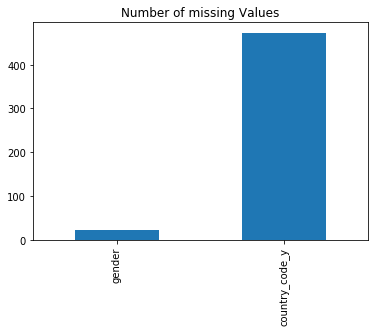

In [6]:
dataset2_df[['gender', 'country_code_y']].isnull().sum().plot(kind='bar', title='Number of missing Values')

The info function of the 'dataset2_df' dataframe shows that we do not have to deal with a huge amound of null values. The null values related to the location of the startup are not important at this moment, and we are not hugely necessary for our 2nd and 3rd RQ, for the time being we will leave them as they are.

There is also no point in removing null values from the 'gender' field as this is not relevant for our RQ analysis at this point. It will just decrease the accuracy of our results if we remove them. 

### Adding startup industry details to a founders instance

We will only need the columns that detail the startups of a founder's industry. We have previously merged all other neccessary information like the company name and country code etc. The main focus here is gaining that information, so we can use it for our analysis in the future for our 2nd and 3rd RQ.

In [7]:
list(dataset1_df)

['company_name',
 'roles',
 'country_code',
 'state_code',
 'region',
 'city',
 'status',
 'category_list',
 'category_group_list',
 'funding_rounds',
 'funding_total_usd',
 'last_funding_on',
 'founded_on',
 'employee_count',
 'org_uuid',
 'primary_role',
 'type',
 'Administrative Services',
 'Advertising',
 'Agriculture and Farming',
 'Biotechnology',
 'Clothing and Apparel',
 'Commerce and Shopping',
 'Community and Lifestyle',
 'Consumer Goods',
 'Content and Publishing',
 'Design',
 'Education',
 'Energy',
 'Events',
 'Food and Beverage',
 'Government and Military',
 'Hardware',
 'Health Care',
 'Manufacturing',
 'Media and Entertainment',
 'Music and Audio',
 'Natural Resources',
 'Navigation and Mapping',
 'Platforms',
 'Privacy and Security',
 'Professional Services',
 'Real Estate',
 'Sales and Marketing',
 'Science and Engineering',
 'Sports',
 'Sustainability',
 'Transportation',
 'Travel and Tourism',
 'Video',
 'Technology',
 'Finance',
 'Communication']

**Next Step...**

The next step is merging these two dataframes so all relevant information is in one single dataframe. This resulting dataframe will be our second dataset that will be used for analysis and results.
I would like to have the columns in a specific order so this is what I will be doing next.

In [8]:
# a list defining the industry columns in the dataframe as well as org_uuid to be used as index to merge df on.
industry_cols = ['org_uuid',  'Administrative Services',  'Advertising',  'Agriculture and Farming',  'Biotechnology',  'Clothing and Apparel',  'Commerce and Shopping',  'Community and Lifestyle',  'Consumer Goods',  'Content and Publishing',  'Design',  'Education',  'Energy',  'Events',  'Food and Beverage',  'Government and Military',  'Hardware',  'Health Care',  'Manufacturing',  'Media and Entertainment',  'Music and Audio',  'Natural Resources',  'Navigation and Mapping',  'Platforms',  'Privacy and Security',  'Professional Services',  'Real Estate',  'Sales and Marketing',  'Science and Engineering',  'Sports',  'Sustainability',  'Transportation',  'Travel and Tourism',  'Video',  'Technology',  'Finance',  'Communication']
# defining the dataframe to be merged
df_for_merge = dataset1_df[industry_cols]
new_dataset2_df = dataset2_df.merge(df_for_merge, on='org_uuid', how='inner')
new_dataset2_df.rename(columns={'country_code_y':'country_code', 'state_code_y':'state_code', 'city_y':'city'},inplace=True)
new_dataset2_df.head(5)

,first_name,last_name,gender,company_name,funding_rounds,funding_total_usd,primary_role,country_code,state_code,city,title,job_type,subject,degree_type,person_uuid,degree_uuid,institution_uuid,org_uuid,Highest_Degree,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
0,Steve,Wozniak,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,Co-founder,executive,EE & CS,bs,f3abe539-8db3-57e4-0f4d-de54a78eaf68,fe3eb345-b465-84ad-45d7-448f8f7a44e5,10f9a25b-9675-2281-486e-a52955c706df,7063d087-96b8-2cc1-ee88-c221288acc2a,Bachelors,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Kevin,Harvey,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,Founder,executive,Engineering,bs,e7f5c146-66c5-fba4-64cb-8ffd422899d8,0dee09e8-13b6-50ee-3e17-1343036b2eed,c3144da5-8618-2e95-3a13-60417220da5e,7063d087-96b8-2cc1-ee88-c221288acc2a,Bachelors,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Armas,Markkula,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,Founder,executive,Electrical Engineering,bs,56e8a800-5c37-7599-5eb3-b815aa6acd30,29b2a7bc-4628-0e5d-53d1-d0af77d3de33,867f0af5-a1d0-143d-bbed-5cc252ca40d6,7063d087-96b8-2cc1-ee88-c221288acc2a,Masters,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Armas,Markkula,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,Founder,executive,Electrical Engineering,ms,56e8a800-5c37-7599-5eb3-b815aa6acd30,9da52706-0933-81f3-5be3-5ae30747612e,867f0af5-a1d0-143d-bbed-5cc252ca40d6,7063d087-96b8-2cc1-ee88-c221288acc2a,Masters,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Kristee,Rosendahl,female,Apple,4,6.150250e+09,company,USA,CA,Cupertino,"Designer, Art Director, Human Interface Co-fou...",employee,Design,ba,035e9cc5-d2a4-9298-7488-c348527a5d1a,0c2be7d4-47cd-8758-e668-34593c6c605f,20135206-96eb-8be0-9ac4-670b257e532c,7063d087-96b8-2cc1-ee88-c221288acc2a,Bachelors,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
new_dataset2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44711 entries, 0 to 44710
Data columns (total 55 columns):
first_name                 44711 non-null object
last_name                  44711 non-null object
gender                     44692 non-null object
company_name               44711 non-null object
funding_rounds             44711 non-null int64
funding_total_usd          44711 non-null float64
primary_role               44711 non-null object
country_code               44391 non-null object
state_code                 31452 non-null object
city                       43869 non-null object
title                      44711 non-null object
job_type                   44711 non-null object
subject                    44711 non-null object
degree_type                44696 non-null object
person_uuid                44711 non-null object
degree_uuid                44711 non-null object
institution_uuid           44711 non-null object
org_uuid                   44711 non-null object
Highest_D

In [10]:
new_dataset2_df.shape

(44711, 55)

### Saving resulting dataset for 350_prep_dataset2 in pickle

This dataset will be used for inital analysis notebook for RQ2.

In [11]:
new_dataset2_df.to_pickle("../../data/processed/350_dataset2.pkl")